In [1]:
from scipy import stats

In [2]:
import numpy as np

In [3]:
x_mean = 9.57
mu = 9.5
sigma = 0.4
n = 160
Z = (x_mean - mu) / (sigma / np.sqrt(n))
print(Z)

2.213594362117875


In [5]:
print(2 * (1 - stats.norm.cdf(abs(Z))))

0.026856695507523787


In [9]:
1 - stats.norm.cdf(2.2135)

0.013431596618440844

In [10]:
import pandas as pd
import sklearn

In [17]:
from sklearn import model_selection

In [11]:
data = pd.read_csv('diamonds.txt', header=0, sep='\t')

In [12]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [13]:
X = data.drop('price', axis=1)
y = data[['price']]

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

In [21]:
from sklearn import ensemble

In [23]:
from sklearn import linear_model

In [25]:
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

In [26]:
model2 = ensemble.RandomForestRegressor(random_state=1)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sysak_ma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [27]:
from sklearn import metrics

In [28]:
metrics.mean_absolute_error(y_test, pred1)

890.3764004285604

In [29]:
metrics.mean_absolute_error(y_test, pred2)

802.9205172724115

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


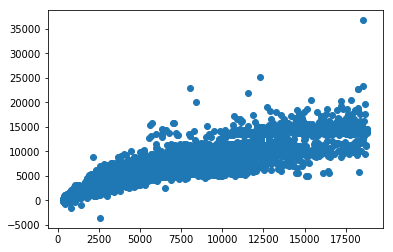

In [33]:
pylab.scatter(y_test, pred1)
pylab.show()

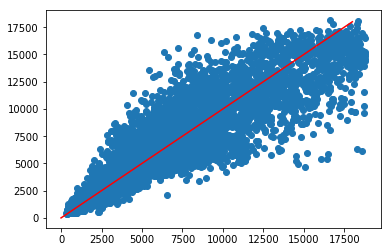

In [36]:
pylab.scatter(y_test, pred2)
pylab.plot(range(18000), color='r')
pylab.show()

In [39]:
difs1 = np.array([abs(x - y) for x, y in zip(pred1.ravel(), np.array(y_test).ravel())])
difs2 = np.array([abs(x - y) for x, y in zip(pred2.ravel(), np.array(y_test).ravel())])

In [40]:
difs1.mean()

890.3764004285604

In [41]:
difs2.mean()

802.9205172724115

In [42]:
stats.ttest_rel(difs1, difs2)

Ttest_relResult(statistic=13.01772978387856, pvalue=1.6551745751413995e-38)

In [45]:
from statsmodels.stats.weightstats import DescrStatsW

In [46]:
print(DescrStatsW(difs1 - difs2).tconfint_mean())

(74.28724532595444, 100.62452098634296)


In [49]:
import scipy

In [47]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [52]:
proportions_diff_z_test(proportions_diff_z_stat_ind([1] * 4 + [0] * 12, [1] * 10 + [0] * 24), 'less')

0.37293045872523534

In [53]:
data = pd.read_csv('banknotes.txt', header=0, sep='\t')
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [55]:
X1 = data[['X1', 'X2', 'X3']]
X2 = data[['X4', 'X5', 'X6']]
y = data[['real']]

In [72]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = model_selection.train_test_split(X1, X2, y, test_size=0.25, random_state=1)

In [78]:
cl1 = linear_model.LogisticRegression()
cl2 = linear_model.LogisticRegression()

In [80]:
cl1.fit(X1_train, y_train)
pred1 = cl1.predict(X1_test)
pred1

/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0])

In [81]:
cl2.fit(X2_train, y_train)
pred2 = cl2.predict(X2_test)
pred2


/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0])

In [101]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample1)
    print(z, n)
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    print(f, g)
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample1)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [93]:
proportions_diff_z_test(proportions_diff_z_stat_rel(pred1, pred2))

0.07402254292538113

In [94]:
metrics.accuracy_score(pred1, y_test)

0.8

In [95]:
metrics.accuracy_score(pred2, y_test)

0.98

In [102]:
proportions_diff_confint_rel(pred1, pred2)

1.959963984540054 50
3 0.0


(-0.005826784440248742, 0.12582678444024875)

In [103]:
X_m = 541.4
mu = 525
sigma = 100
n = 100
Z = (X_m - mu) / (sigma / np.sqrt(n))
print(Z)

1.6399999999999977


In [104]:
1 - stats.norm.cdf(Z)

0.05050258347410397

In [105]:
X_m = 541.5
mu = 525
sigma = 100
n = 100
Z = (X_m - mu) / (sigma / np.sqrt(n))
print(Z)

1.65


In [106]:
1 - stats.norm.cdf(Z)

0.0494714680336481

In [107]:
data = pd.read_csv('banknotes.txt', header=0, sep='\t')
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [108]:
data_train, data_test = model_selection.train_test_split(data, test_size=50, random_state=1)

In [110]:
cl1 = linear_model.LogisticRegression()

In [111]:
cl1.fit(data_train[['X1', 'X2', 'X3']], data_train[['real']])
pred1 = cl1.predict(data_test[['X1', 'X2', 'X3']])
metrics.accuracy_score(pred1, data_test[['real']])

/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8

In [112]:
cl2.fit(data_train[['X4', 'X5', 'X6']], data_train[['real']])
pred2 = cl2.predict(data_test[['X4', 'X5', 'X6']])
metrics.accuracy_score(pred2, data_test[['real']])

/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sysak_ma/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.98

In [114]:
preds = list(zip(pred1, pred2))

In [124]:
f = sum([1 if x == (1,0) else 0 for x in preds])
f

3

In [125]:
g = sum([1 if x == (0,1) else 0 for x in preds])
g

8

In [126]:
n = len(preds)
n

50

In [128]:
z = float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )
z

-1.543033499620919

In [129]:
proportions_diff_z_test(z)

0.12282264810139254

In [132]:
z = scipy.stats.norm.ppf(1 - 0.05 / 2.)
z

1.959963984540054

In [134]:
left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    

print(left_boundary, right_boundary)

-0.22702018362022364 0.027020183620223626


In [135]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)
    
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample1)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [146]:
errs1 = [1 if x != y else 0 for x, y in zip(pred1, np.array(data_test[['real']]).ravel())]
sum(errs1)

10

In [147]:
errs2 = [1 if x != y else 0 for x, y in zip(pred2, np.array(data_test[['real']]).ravel())]
sum(errs2)

1

In [148]:
proportions_diff_z_test(proportions_diff_z_stat_rel(errs1, errs2))

0.0032969384555543435

In [149]:
proportions_diff_confint_rel(errs1, errs2)

(0.059945206279614305, 0.3000547937203857)

In [140]:
np.array(data_test[['real']]).ravel()

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0])

In [141]:
pred1

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0])

In [142]:
pred2

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0])